# Ejercicio Formativo 2 Capítulo 5

Links útiles para los tags de Open Street Maps:

- https://wiki.openstreetmap.org/wiki/Map_features
- https://taginfo.openstreetmap.org/tags

## Descargando Datos

In [ ]:
!unzip Data.zip

Archive:  Data.zip
   creating: Data/Areas Urbanas/
  inflating: Data/Areas Urbanas/areas_urbanas.dbf  
  inflating: Data/Areas Urbanas/areas_urbanas.prj  
  inflating: Data/Areas Urbanas/areas_urbanas.sbn  
  inflating: Data/Areas Urbanas/areas_urbanas.sbx  
  inflating: Data/Areas Urbanas/areas_urbanas.shp  
  inflating: Data/Areas Urbanas/areas_urbanas.shp.xml  
  inflating: Data/Areas Urbanas/areas_urbanas.shx  
  inflating: Data/Areas Urbanas/Disclaimer.txt  
   creating: Data/Distritos Censales/
  inflating: Data/Distritos Censales/centroides Distritos Censales RM.dbf  
  inflating: Data/Distritos Censales/centroides Distritos Censales RM.prj  
  inflating: Data/Distritos Censales/centroides Distritos Censales RM.qpj  
  inflating: Data/Distritos Censales/centroides Distritos Censales RM.shp  
  inflating: Data/Distritos Censales/centroides Distritos Censales RM.shx  
  inflating: Data/Distritos Censales/Distritos Censales RM.dbf  
  inflating: Data/Distritos Censales/Distritos C

## Importando Librerías

In [1]:
!pip install osmnx

In [2]:
import osmnx as ox
import networkx as nx
import geopandas as gpd
from IPython.display import display #para mostrar más de un elemento por celda de Jupyter
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams.update({'font.size': 16})

## Misión 1: Estime el tiempo que demora en caminar una persona desde la estación de metro San Joaquín, hasta la sala BC24

Se debe recordar que se pueden especificar diferentes tipos de redes con el argumento `network_type`, por ejemplo:

- `drive`: Obtiene todas las calles públicas.
- `drive_service`: Obtiene todas las calles públicas, incluyendo vías de servicio.
- `walk`: Obtiene todos los tramos, vias o calles donde pueden transitar peatones.
- `bike`: Obtiene todas las vías donde pueden transitar ciclistas.
- `all`: Descarga todos los tramos de acceso público.
- `all_private`: Descarga todos los tramos de acceso público, incluidas las vías privadas.

Para cumplir esta misión se debe realizar lo siguiente:
1. Generar la red que contenga a la estación de metro San Joaquín y la sala BC24
2. El nodo más cercano a la posición del metro San Joaquín.
3. El nodo más cercano a la posición de la sala BC24.
4. Determinar cuanto tiempo tarda una persona en recorrer dicha distancia.



### Pasos generales

Generamos la red que contiene a la estación de metro San Joaquín y la sala BC24

In [3]:
cf='["highway"~"footway"]'

In [4]:
G_Macul = ox.graph.graph_from_place('Macul, Chile', network_type = 'walk', custom_filter=cf)

Revisamos que es lo que hizo el filtro `custom_filter`

In [5]:
edges_G_Macul_gdf = ox.graph_to_gdfs(G_Macul, nodes=False)

In [6]:
edges_G_Macul_gdf["highway"].value_counts()

highway
footway    574
Name: count, dtype: int64

Se obtienen los datos de las estaciones de metro

In [7]:
estaciones_metro = gpd.read_file('Data/Metro 2020/Estaciones_2020/Estaciones_2020.shp')

In [8]:
estaciones_metro.head(5)

,OBJECTID,ID_LINEA,LINEA,ESTACION,NOMBRE,POINT_X,POINT_Y,geometry
0,2,2,L2,EL PARRON,El Parrón,345717.3664,6.289105e+06,POINT (345717.366 6289105.444)
1,3,5,L5,CUMMING,Cumming,344899.1198,6.298782e+06,POINT (344899.120 6298781.571)
2,4,5,L5,QUINTA NORMAL,Quinta Normal,343809.1081,6.298628e+06,POINT (343808.803 6298622.125)
3,5,7,L4A,SAN RAMON,San Ramón,346685.4133,6.287624e+06,POINT (347436.975 6287501.270)
4,6,7,L4A,SANTA ROSA,Santa Rosa,348282.5816,6.287378e+06,POINT (348282.582 6287378.409)


In [9]:
estaciones_metro.crs

<Projected CRS: EPSG:32719>
Name: WGS 84 / UTM zone 19S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°W and 66°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Chile. Colombia. Peru.
- bounds: (-72.0, -80.0, -66.0, 0.0)
Coordinate Operation:
- name: UTM zone 19S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
estaciones_metro.to_crs("EPSG:4326", inplace=True)

Filtramos para dejar solo los datos que necesitamos, se dejan solo los datos de la estación de metro San Joaquín

In [11]:
estacion_metro_San_Joaquin = estaciones_metro.loc[estaciones_metro["NOMBRE"]=="San Joaquín"]

In [12]:
estacion_metro_San_Joaquin.head()

,OBJECTID,ID_LINEA,LINEA,ESTACION,NOMBRE,POINT_X,POINT_Y,geometry
43,46,5,L5,SAN JOAQUIN,San Joaquín,349853.0827,6.292455e+06,POINT (-70.61593 -33.49900)


Se obtiene la posición de la estación de metro San Joaquín a partir de la geometría

In [13]:
posicion_metro_San_Joaquin = (estacion_metro_San_Joaquin.geometry.x.iloc[0], estacion_metro_San_Joaquin.geometry.y.iloc[0])

In [14]:
print(posicion_metro_San_Joaquin)

(-70.61592605445665, -33.49900096226658)


Se obtiene el nodo más cercano a la posición del metro San Joaquín

In [15]:
nodo_estacion_metro_San_Joaquin = ox.distance.nearest_nodes(G_Macul, posicion_metro_San_Joaquin[0], posicion_metro_San_Joaquin[1])

Usando Google Maps se obtuvo que las coordenadas de la sala BC24 son las siguientes:

In [16]:
posicion_BC24 = (-33.50026366987983, -70.6127608118863)

Se obtiene el nodo más cercano a la posición de la sala BC24

In [17]:
nodo_sala_BC24 = ox.distance.nearest_nodes(G_Macul, posicion_BC24[1], posicion_BC24[0])

### Forma A

Se calcula la distancia entre la estación de metro San Joaquín y la sala BC24, se asume que la persona optará por toma el camino más corto.

In [18]:
distancia_SJ_BC24 = nx.shortest_path_length(G_Macul, nodo_estacion_metro_San_Joaquin, nodo_sala_BC24, weight = 'length')

In [19]:
print(f"La distancia desde la estación de metro San Joaquín a la sala BC24 es: {distancia_SJ_BC24} metros")

La distancia desde la estación de metro San Joaquín a la sala BC24 es: 471.633 metros


La velocidad al caminar de una persona promedio es 3-5 km/h, se tomará el valor más bajo 3km/h esto a metros/min es 50m/min.

In [20]:
tiempo_estacion_SJ_BC24 = distancia_SJ_BC24 / 50

In [21]:
print(f"El tiempo que demora en caminar una persona desde la estación de metro San Joaquín hasta la sala BC24 es: {tiempo_estacion_SJ_BC24} minutos aproximadamente")

El tiempo que demora en caminar una persona desde la estación de metro San Joaquín hasta la sala BC24 es: 9.43266 minutos aproximadamente


### Forma B

In [22]:
hwy_speeds={ 'footway': 3 }

In [23]:
G_Macul = ox.add_edge_speeds(G_Macul, hwy_speeds=hwy_speeds)

In [24]:
G_Macul = ox.add_edge_travel_times(G_Macul)

In [25]:
edges_G_Macul_gdf = ox.graph_to_gdfs(G_Macul, nodes=False)

In [26]:
edges_G_Macul_gdf.head(5)

osmid  highway  oneway  \
u          v          key                                            
5601399809 1699953923 0                 157742518  footway   False   
           6754083521 0                 157742518  footway   False   
           1699954023 0                 586201779  footway   False   
5601399811 1699957265 0    [378688942, 157742518]  footway   False   
           1699953923 0                 157742518  footway   False   

                                reversed  length  speed_kph  travel_time  \
u          v          key                                                  
5601399809 1699953923 0            False  47.105          3         56.5   
           6754083521 0             True  92.832          3        111.4   
           1699954023 0             True  47.332          3         56.8   
5601399811 1699957265 0    [False, True]  19.868          3         23.8   
           1699953923 0             True  31.501          3         37.8   

                                                                    geometry  \
u          v          key                                                      
5601399809 1699953923 0    LINESTRING (-70.60902 -33.50034, -70.60953 -33...   
           6754083521 0    LINESTRING (-70.60902 -33.50034, -70.60803 -33...   
           1699954023 0    LINESTRING (-70.60902 -33.50034, -70.60898 -33...   
5601399811 1699957265 0    LINESTRING (-70.60986 -33.50024, -70.60992 -33...   
           1699953923 0    LINESTRING (-70.60986 -33.50024, -70.60980 -33...   

                          tunnel bridge width  
u          v          key                      
5601399809 1699953923 0      NaN    NaN   NaN  
           6754083521 0      NaN    NaN   NaN  
           1699954023 0      NaN    NaN   NaN  
5601399811 1699957265 0      NaN    NaN   NaN  
           1699953923 0      NaN    NaN   NaN

In [27]:
tiempo_estacion_SJ_BC24 = nx.shortest_path_length(G_Macul, nodo_estacion_metro_San_Joaquin, nodo_sala_BC24, weight='travel_time')

In [28]:
print(f"El tiempo que demora en caminar una persona desde la estación de metro San Joaquín hasta la sala BC24 es: {tiempo_estacion_SJ_BC24/60} minutos aproximadamente")

El tiempo que demora en caminar una persona desde la estación de metro San Joaquín hasta la sala BC24 es: 9.433333333333335 minutos aproximadamente


## Misión 2: Un estudiante olvidó el computador en su casa y debe ir a buscarlo durante el horario de almuerzo para poder participar de la clase de Programación como Herramienta para la Ingeniería. Si antes del almuerzo el estudiante tenía clases en la sala A3, ¿cuál es el distrito censal de Santiago urbano más lejano en el que se puede ubicar su casa? Asuma que solo es posible caminar y viajar en metro

Datos:
* Velocidad al caminar de una persona: 3km/h
* Velocidad promedio del metro: 34km/h
* Tiempo disponible: 1 hora con 20 minutos u 80 minutos

Lógica:

Para determinar el distrito censal de Santiago urbano más lejano en el que se puede ubicar su casa, se buscará el distrito al que le tome llegar 40 minutos  desde la sala A3, esto es debido a que el estudiante debería ir por su computador y traerlo, el tiempo que le toma buscar su computador en su casa se despreciará.

Se obtiene la posición de la sala A3

In [29]:
posicion_A3 = (-33.499876, -70.612782)

Se obtienen los datos de Santiago urbano

In [30]:
chile_urbano = gpd.read_file('Data/Areas Urbanas/areas_urbanas.shp')

In [31]:
chile_urbano.to_crs("EPSG:4326", inplace=True)

In [32]:
santiago_urbano = chile_urbano.loc[chile_urbano['NOMBRE']=='Santiago']

Se genera la red que solo considera caminos peatonales y carreteras (primarias y secundarias)

In [33]:
cf='["highway"~"footway|primary|secondary"]'

In [34]:
G_caminar_santiago_urbano = ox.graph.graph_from_polygon(santiago_urbano.geometry.iloc[0], network_type='walk', custom_filter=cf)

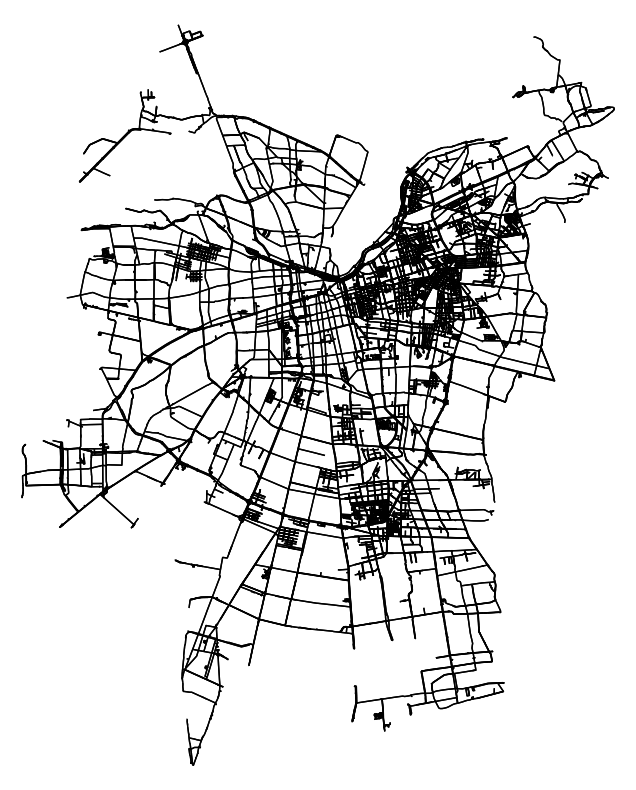

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

In [35]:
ox.plot_graph(G_caminar_santiago_urbano, figsize = (10,10), bgcolor = 'w', node_color = 'red', edge_color = 'black', node_alpha = 0)

Se genera un Geodataframe a partir de la red para revisar los efecto del filtro hecho con el parámetro `custom_filter`

In [36]:
edges_caminar_santiago_urbano_gdf = ox.graph_to_gdfs(G_caminar_santiago_urbano, nodes=False)

Como se puede ver solo se considerán las vías que se señalaron en el filtro

In [37]:
edges_caminar_santiago_urbano_gdf["highway"].value_counts()

highway
footway                               52422
secondary                             11188
primary                               10266
primary_link                           1570
secondary_link                          778
[primary, secondary]                     34
[footway, primary_link]                  14
[secondary, primary_link]                10
[primary, primary_link]                  10
[secondary_link, secondary]               6
[secondary_link, footway]                 4
[footway, secondary]                      2
[primary, secondary, primary_link]        2
[secondary_link, primary_link]            2
Name: count, dtype: int64

In [38]:
edges_caminar_santiago_urbano_gdf.columns

Index(['osmid', 'oneway', 'lanes', 'name', 'highway', 'maxspeed', 'reversed',
       'length', 'geometry', 'bridge', 'access', 'ref', 'junction', 'width',
       'tunnel', 'area'],
      dtype='object')

Se ajusta la velocidad, la siguiente línea de código hace que independiente de la vía que se use se recorrera a una velocidad de 3km/h

In [39]:
hs = {'footway': 3, 'primary': 3, 'primary_link': 3 , 'secondary': 3, 'secondary_link': 3}

In [40]:
G_caminar_santiago_urbano = ox.add_edge_speeds(G_caminar_santiago_urbano, hwy_speeds=hs)

In [41]:
(nodes_caminar_santiago_urbano_gdf, edges_caminar_santiago_urbano_gdf) = ox.graph_to_gdfs(G_caminar_santiago_urbano)

In [42]:
edges_caminar_santiago_urbano_gdf["speed_kph"].value_counts()

speed_kph
3.0     65630
50.0     8780
60.0      716
40.0      680
30.0      352
55.0       72
45.0       40
20.0       18
70.0       16
35.0        2
43.0        2
Name: count, dtype: int64

In [43]:
edges_caminar_santiago_urbano_gdf.apply(lambda x: sum(x.isnull()),axis=0)

osmid            0
oneway           0
lanes        53396
name         53790
highway          0
maxspeed     65630
reversed         0
length           0
speed_kph        0
geometry         0
bridge       75232
access       75170
ref          75712
junction     76082
width        75868
tunnel       76090
area         76254
dtype: int64

In [44]:
edges_caminar_santiago_urbano_gdf['speed_kph'] = 3

In [45]:
edges_caminar_santiago_urbano_gdf["speed_kph"].value_counts()

speed_kph
3    76308
Name: count, dtype: int64

In [46]:
G_caminar_santiago_urbano = ox.graph_from_gdfs(nodes_caminar_santiago_urbano_gdf, edges_caminar_santiago_urbano_gdf)

Se genera la red que solo considera las estaciones de metro, las entradas a las estaciones de metro y los rieles del metro

In [47]:
cf = '["railway"~"station|subway_entrance|subway"]'

In [48]:
G_metro_santiago_urbano = ox.graph.graph_from_polygon(santiago_urbano.geometry.iloc[0], retain_all = True, custom_filter=cf)

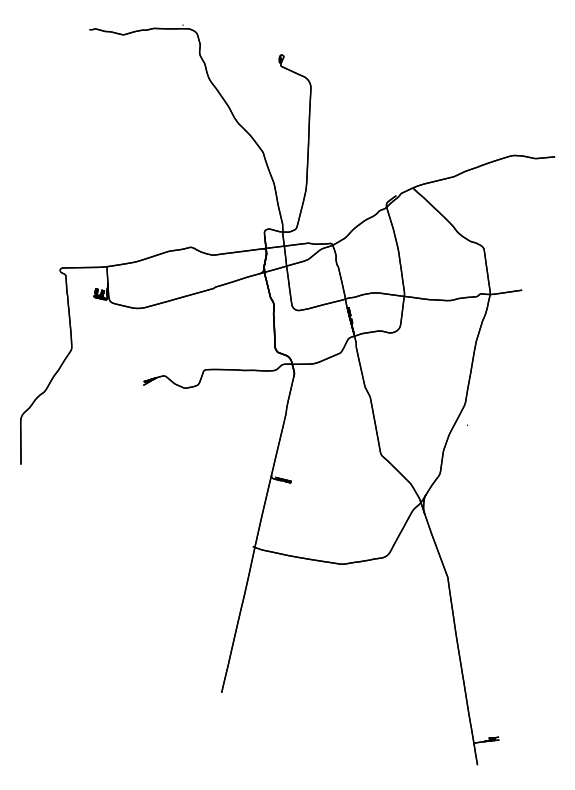

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

In [49]:
ox.plot_graph(G_metro_santiago_urbano, figsize = (10,10), bgcolor = 'w', node_color = 'red', edge_color = 'black', node_alpha = 0)

In [50]:
(nodes_metro_santiago_urbano_gdf, edges_metro_santiago_urbano_gdf) = ox.graph_to_gdfs(G_metro_santiago_urbano)

In [51]:
edges_metro_santiago_urbano_gdf.columns

Index(['osmid', 'tunnel', 'ref', 'name', 'oneway', 'reversed', 'length',
       'service', 'geometry', 'bridge'],
      dtype='object')

In [52]:
edges_metro_santiago_urbano_gdf['highway'] = 'subway'

In [53]:
G_metro_santiago_urbano = ox.graph_from_gdfs(nodes_metro_santiago_urbano_gdf, edges_metro_santiago_urbano_gdf)

Se ajusta la velocidad, la siguiente línea de código hace que independiente de la vía que se use se recorrera a una velocidad de 34km/h

In [54]:
G_metro_santiago_urbano = ox.add_edge_speeds(G_metro_santiago_urbano, hwy_speeds={'subway': 34})

In [55]:
(nodes_metro_santiago_urbano_gdf, edges_metro_santiago_urbano_gdf) = ox.graph_to_gdfs(G_metro_santiago_urbano)

In [56]:
edges_metro_santiago_urbano_gdf['speed_kph'].value_counts()

speed_kph
34    632
Name: count, dtype: int64

Se combinan las redes

In [57]:
G_caminar_metro = nx.compose(G_metro_santiago_urbano, G_caminar_santiago_urbano)

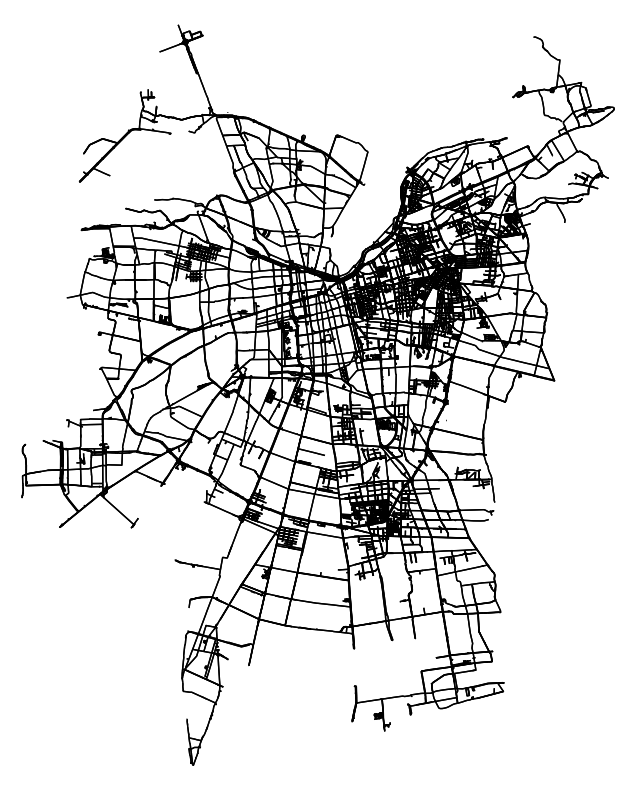

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

In [58]:
ox.plot_graph(G_caminar_metro, figsize=(10, 10), bgcolor='w', node_color='red', edge_color='black', node_alpha=0)

Se calcula el tiempo de viaje en base a la longitud y la velocidad de cada arista

In [59]:
G_caminar_metro = ox.add_edge_travel_times(G_caminar_metro)

Se obtiene la información de los distritos censales

In [60]:
distritos = gpd.read_file('Data/Distritos Censales/Distritos Censales RM.shp')

In [61]:
distritos.to_crs('EPSG:4326', inplace=True)

Nos quedamos solo con los distritos censales de Santiago urbano

In [62]:
distritos_santiago_urbano = gpd.overlay(distritos, santiago_urbano, how='intersection')

In [63]:
distritos_santiago_urbano_m2 = distritos_santiago_urbano.copy()

In [64]:
nodo_A3 = ox.distance.nearest_nodes(G_caminar_metro, posicion_A3[1], posicion_A3[0])

In [65]:
distritos_santiago_urbano_m2['nodo_distrito'] = distritos_santiago_urbano_m2.apply(lambda distrito: ox.distance.nearest_nodes(G_caminar_metro, distrito.geometry.centroid.x, distrito.geometry.centroid.y), axis=1)

In [66]:
distritos_santiago_urbano_m2.head(5)

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,...,ADIMARK_T,Area,Densidad,1_UF_M2,NOMBRE,TIPO_AREA,SHAPE_Leng,SHAPE_Area,geometry,nodo_distrito
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,...,3412.0,704315.75,48.44,31.09,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((-70.64812 -33.43330, -70.64645 -33.4...",6358908261
1,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Moneda,1310102.0,51.0,560.0,999.0,...,2741.0,1166659.89,23.49,21.10,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((-70.65698 -33.43182, -70.65337 -33.4...",10702059675
2,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Amunátegui,1310103.0,38.0,389.0,956.0,...,2387.0,509080.85,46.89,12.00,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((-70.66031 -33.43095, -70.65861 -33.4...",5419431460
3,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Brasil,1310104.0,52.0,657.0,1728.0,...,5062.0,761738.52,66.45,10.25,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((-70.66020 -33.43747, -70.66004 -33.4...",10838167422
4,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Chacabuco,1310105.0,45.0,643.0,1092.0,...,2899.0,765782.74,37.86,11.87,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((-70.67786 -33.44386, -70.66817 -33.4...",11062781023


In [67]:
def calcular_tiempo_viaje(grafo, nodo_inicio, nodo_fin):
    try:
        tiempo_viaje = nx.shortest_path_length(grafo, nodo_inicio, nodo_fin, weight='travel_time')
    except nx.NetworkXNoPath:
        tiempo_viaje = float('inf')  # Valor por defecto si no hay camino
    return tiempo_viaje

In [68]:
distritos_santiago_urbano_m2['tiempo_viaje_A3'] = distritos_santiago_urbano_m2.apply(lambda distrito: calcular_tiempo_viaje(G_caminar_metro, nodo_A3, distrito.nodo_distrito), axis=1)

In [69]:
distritos_santiago_urbano_m2.head(5)

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,...,Area,Densidad,1_UF_M2,NOMBRE,TIPO_AREA,SHAPE_Leng,SHAPE_Area,geometry,nodo_distrito,tiempo_viaje_A3
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,...,704315.75,48.44,31.09,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((-70.64812 -33.43330, -70.64645 -33.4...",6358908261,9575.2
1,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Moneda,1310102.0,51.0,560.0,999.0,...,1166659.89,23.49,21.10,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((-70.65698 -33.43182, -70.65337 -33.4...",10702059675,10916.8
2,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Amunátegui,1310103.0,38.0,389.0,956.0,...,509080.85,46.89,12.00,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((-70.66031 -33.43095, -70.65861 -33.4...",5419431460,11417.4
3,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Brasil,1310104.0,52.0,657.0,1728.0,...,761738.52,66.45,10.25,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((-70.66020 -33.43747, -70.66004 -33.4...",10838167422,11740.3
4,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Chacabuco,1310105.0,45.0,643.0,1092.0,...,765782.74,37.86,11.87,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((-70.67786 -33.44386, -70.66817 -33.4...",11062781023,12463.0


In [70]:
distritos_cumplen_tiempo = distritos_santiago_urbano_m2.loc[distritos_santiago_urbano_m2['tiempo_viaje_A3'] <= 40 * 60]

In [71]:
distritos_cumplen_tiempo.head()

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,...,Area,Densidad,1_UF_M2,NOMBRE,TIPO_AREA,SHAPE_Leng,SHAPE_Area,geometry,nodo_distrito,tiempo_viaje_A3
283,Región Metropolitana De Santiago,131,Santiago,13129,San Joaquín,El Pinar,1312902.0,257.0,1684.0,1258.0,...,1227059.16,30.06,4.39,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((-70.62612 -33.48581, -70.62055 -33.4...",9319854408,2098.1


In [72]:
distrito_m2_solicitado = distritos_cumplen_tiempo.iloc[0]

In [73]:
print(f"El distrito censal de Santiago urbano más lejano en el que se puede ubicar su casa es: {distrito_m2_solicitado['NOM_DIS']}, se tarda en llegar {distrito_m2_solicitado['tiempo_viaje_A3']/60} minutos aproximadamente")

El distrito censal de Santiago urbano más lejano en el que se puede ubicar su casa es: El Pinar, se tarda en llegar 34.96833333333334 minutos aproximadamente


Se visualizará la ruta

In [74]:
ruta_A3_distrito_m2_solicitado = nx.shortest_path(G_caminar_metro, nodo_A3, distrito_m2_solicitado.nodo_distrito, weight='travel_time')

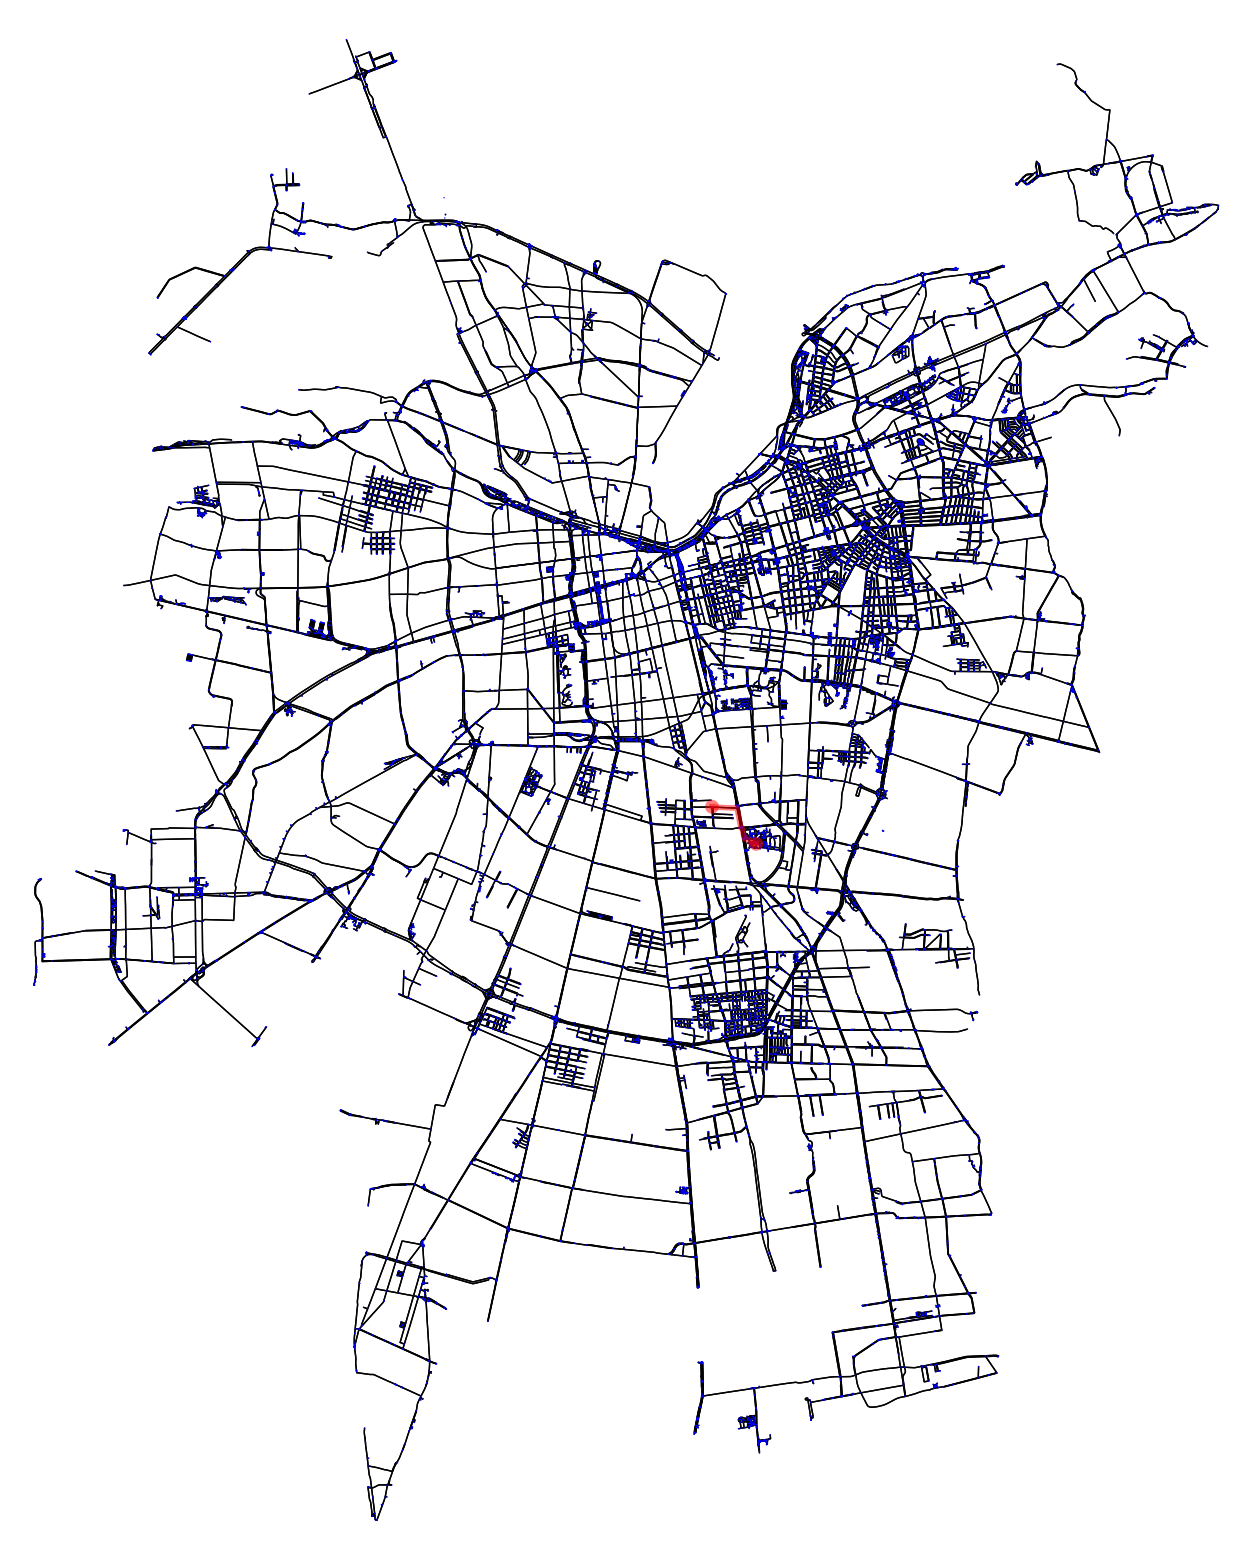

(<Figure size 2000x2000 with 1 Axes>, <Axes: >)

In [75]:
ox.plot_graph_route(G_caminar_metro, ruta_A3_distrito_m2_solicitado, node_size = 1, figsize=(20,20), bgcolor = 'w', node_color = 'blue', edge_color = 'black')

## Misión 3: Repita el ejercicio de la misión anterior, pero teniendo esta vez la posibilidad de utilizar un vehículo particular para viajar. Considere en su desarrollo que el vehículo necesita estacionamiento en el campus

Se debe recordar que se pueden especificar diferentes tipos de redes con el argumento `network_type`, por ejemplo:

- `drive`: Obtiene todas las calles públicas.
- `drive_service`: Obtiene todas las calles públicas, incluyendo vías de servicio.
- `walk`: Obtiene todos los tramos, vias o calles donde pueden transitar peatones.
- `bike`: Obtiene todas las vías donde pueden transitar ciclistas.
- `all`: Descarga todos los tramos de acceso público.
- `all_private`: Descarga todos los tramos de acceso público, incluidas las vías privadas.

Busca la posición del estacionamiento

In [76]:
posicion_estacionamiento = (-33.49669012589041, -70.61240959464479)

Genero la red en la que solo se puede conducir

In [77]:
cf='["highway"~"primary|secondary"]'

In [78]:
G_conducir_santiago_urbano = ox.graph.graph_from_polygon(santiago_urbano.geometry.iloc[0], network_type='drive', custom_filter=cf)

Asigno velocidades a las aristas

In [79]:
hwy_speeds={
        "primary": 30,
        "primary_link": 30,
        "secondary": 30,
        "secondary_link": 30,
    }

In [80]:
G_conducir_santiago_urbano = ox.add_edge_speeds(G_conducir_santiago_urbano, hwy_speeds=hwy_speeds)

Se muestra la red generada

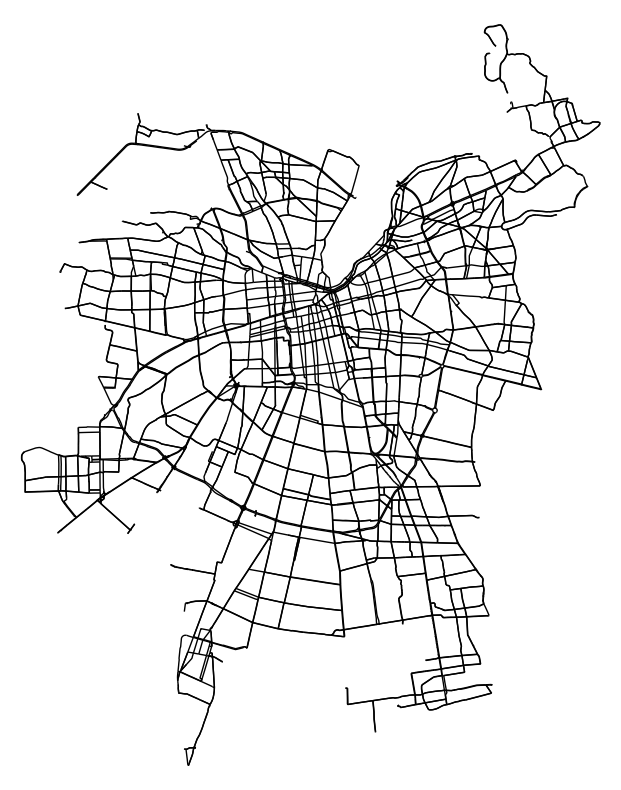

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

In [81]:
ox.plot_graph(G_conducir_santiago_urbano, figsize = (10,10), bgcolor = 'w', node_color = 'red', edge_color = 'black', node_alpha = 0)

Genero red en la que solo se puede caminar, en esta ocasión solo considero `footway`

In [82]:
cf='["highway"~"footway"]'

In [83]:
G_caminar_santiago_urbano = ox.graph.graph_from_polygon(santiago_urbano.geometry.iloc[0], network_type='walk', custom_filter=cf)

Asigno velocidades a la red en la que solo se puede caminar

In [84]:
hwy_speeds={ 'footway': 3 }

In [85]:
G_caminar_santiago_urbano = ox.add_edge_speeds(G_caminar_santiago_urbano, hwy_speeds=hwy_speeds)

In [86]:
edges_caminar_santiago_urbano_gdf = ox.graph_to_gdfs(G_caminar_santiago_urbano, nodes=False)

Combino las redes

In [87]:
G_caminar_metro = nx.compose(G_metro_santiago_urbano, G_caminar_santiago_urbano)

In [88]:
G_caminar_conducir_metro = nx.compose(G_caminar_metro, G_conducir_santiago_urbano)

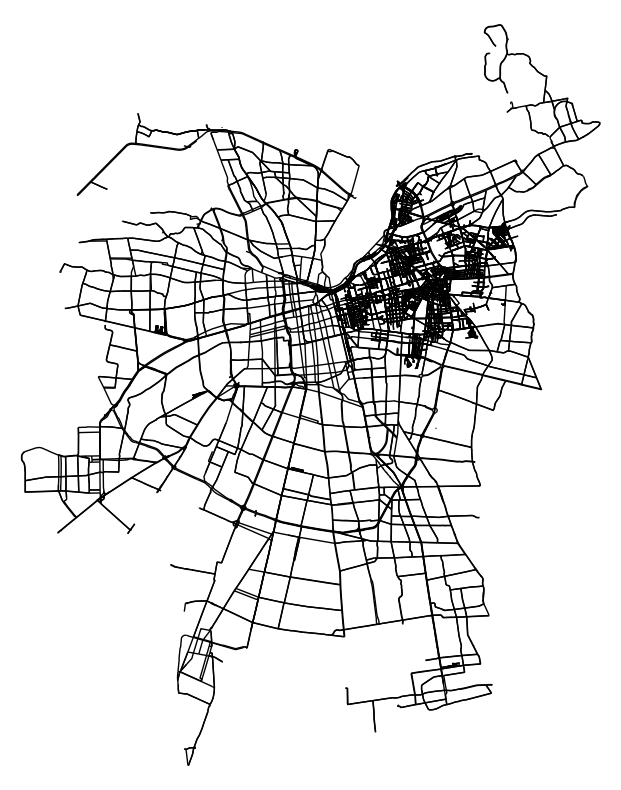

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

In [89]:
ox.plot_graph(G_caminar_conducir_metro, figsize = (10,10), bgcolor = 'w', node_color = 'red', edge_color = 'black', node_alpha = 0)

Calculo velocidades para cada arista

In [90]:
G_caminar_conducir_metro = ox.add_edge_travel_times(G_caminar_conducir_metro)

Genero el nodo asiciado a la sala A3

In [91]:
nodo_A3 = ox.distance.nearest_nodes(G_caminar_conducir_metro, posicion_A3[1], posicion_A3[0])

Genero el nodo asociado al estacionamiento

In [92]:
nodo_estacionamiento = ox.distance.nearest_nodes(G_caminar_conducir_metro, posicion_estacionamiento[1], posicion_estacionamiento[0])

Tiempo desde la sala A3 al estacionamiento

In [93]:
tiempo_estacion_A3_Estacionamiento = nx.shortest_path_length(G_caminar_conducir_metro, nodo_A3, nodo_estacionamiento, weight='travel_time')

In [94]:
print(f"Desde la sala A3 toma llegar al estacionamiento: {tiempo_estacion_A3_Estacionamiento/60} minutos aproximadamente")

Desde la sala A3 toma llegar al estacionamiento: 1.625 minutos aproximadamente


In [95]:
tiempo_disponible = 40*60 - 2*tiempo_estacion_A3_Estacionamiento

In [96]:
distritos_santiago_urbano_m3 = distritos_santiago_urbano.copy()

In [97]:
distritos_santiago_urbano_m3['nodo_distrito'] = distritos_santiago_urbano_m3.apply(lambda distrito: ox.distance.nearest_nodes(G_caminar_conducir_metro, distrito.geometry.centroid.x, distrito.geometry.centroid.y), axis=1)

In [98]:
distritos_santiago_urbano_m3['tiempo_viaje_estacionamiento'] = distritos_santiago_urbano_m3.apply(lambda distrito: calcular_tiempo_viaje(G_caminar_conducir_metro, nodo_estacionamiento, distrito.nodo_distrito), axis=1)

In [99]:
distritos_cumplen_tiempo = distritos_santiago_urbano_m3.loc[distritos_santiago_urbano_m3['tiempo_viaje_estacionamiento'] <= tiempo_disponible]

In [106]:
distritos_cumplen_tiempo.head(5)

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,...,Area,Densidad,1_UF_M2,NOMBRE,TIPO_AREA,SHAPE_Leng,SHAPE_Area,geometry,nodo_distrito,tiempo_viaje_estacionamiento
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,...,704315.75,48.44,31.09,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((-70.64812 -33.43330, -70.64645 -33.4...",6358908261,606.1
1,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Moneda,1310102.0,51.0,560.0,999.0,...,1166659.89,23.49,21.10,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((-70.65698 -33.43182, -70.65337 -33.4...",386348,743.6
2,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Amunátegui,1310103.0,38.0,389.0,956.0,...,509080.85,46.89,12.00,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((-70.66031 -33.43095, -70.65861 -33.4...",5419431460,756.0
3,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Brasil,1310104.0,52.0,657.0,1728.0,...,761738.52,66.45,10.25,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((-70.66020 -33.43747, -70.66004 -33.4...",14760683,781.0
4,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Chacabuco,1310105.0,45.0,643.0,1092.0,...,765782.74,37.86,11.87,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((-70.67786 -33.44386, -70.66817 -33.4...",253281854,776.7


In [101]:
distrito_max_tiempo = distritos_cumplen_tiempo.loc[distritos_cumplen_tiempo['tiempo_viaje_estacionamiento'].idxmax()]

In [102]:
print(f"El distrito más lejano posible es el distrito: {distrito_max_tiempo['NOM_DIS']}")

El distrito más lejano posible es el distrito: Plaza Ossandón


In [109]:
ruta_distrito_max_tiempo = nx.shortest_path(G_caminar_conducir_metro, nodo_estacionamiento, distrito_max_tiempo.nodo_distrito, weight='travel_time')

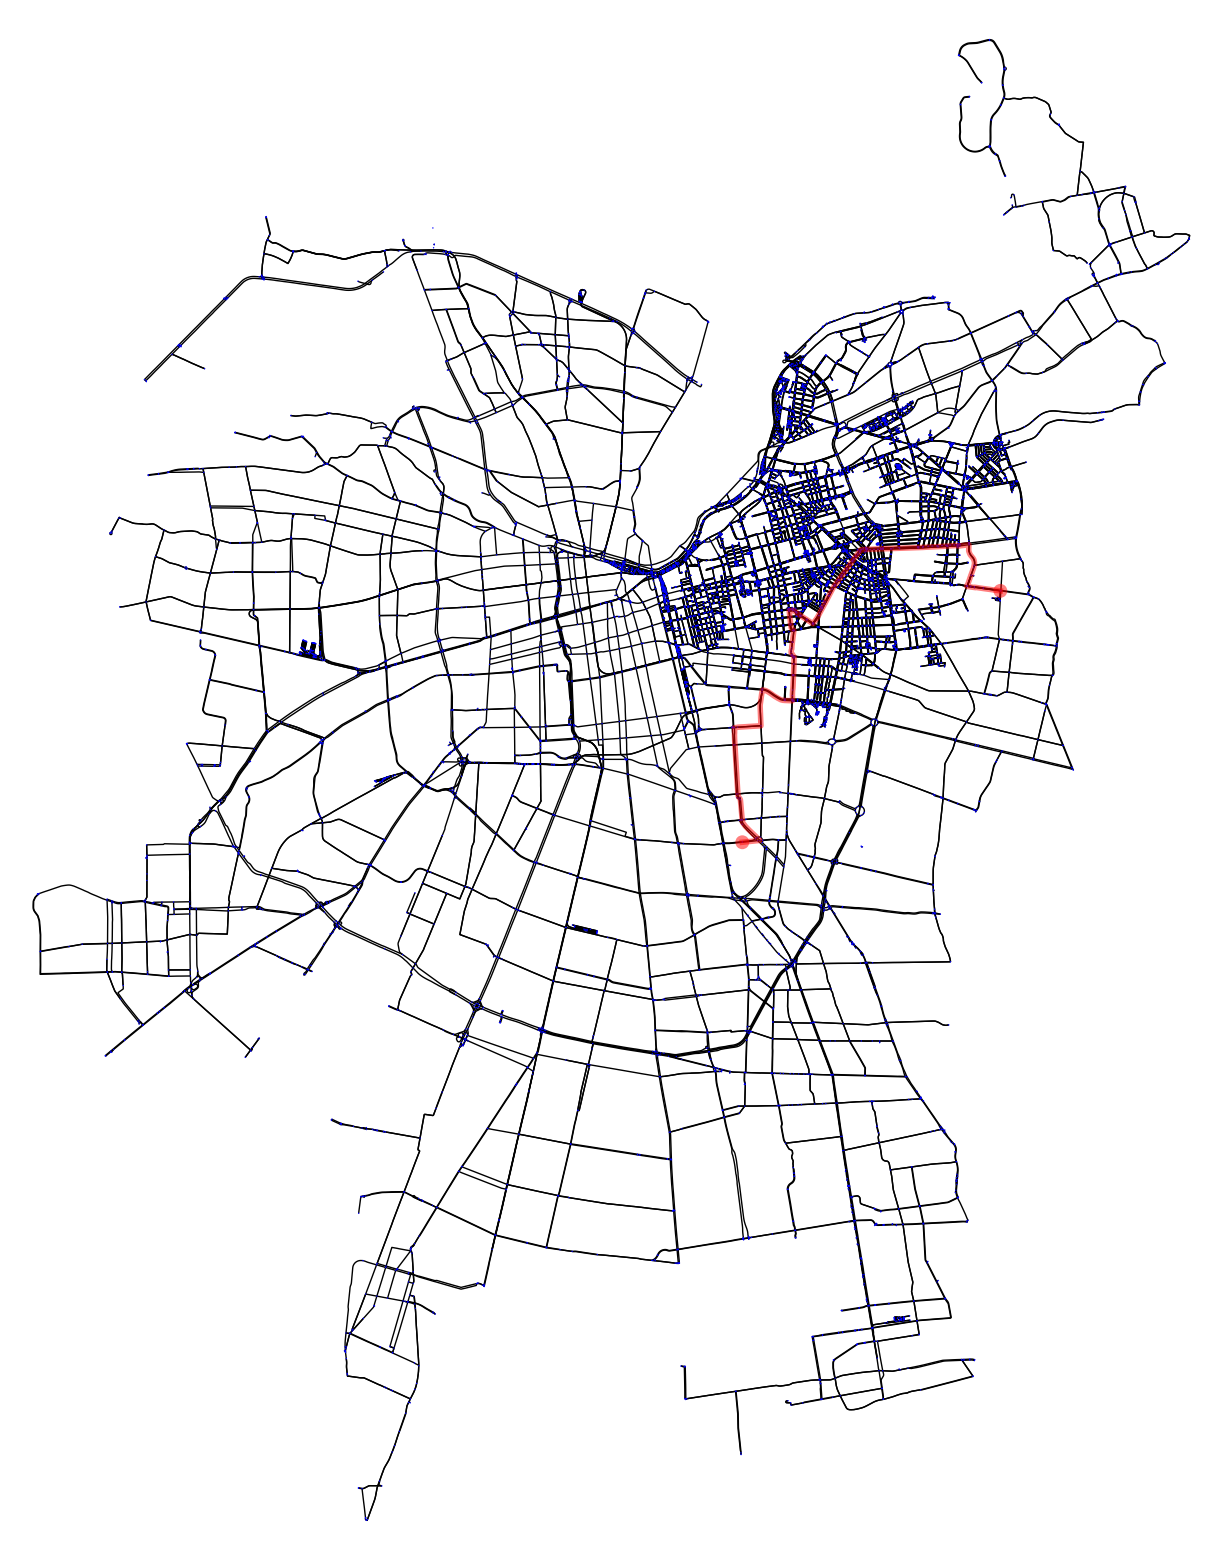

(<Figure size 2000x2000 with 1 Axes>, <Axes: >)

In [110]:
ox.plot_graph_route(G_caminar_conducir_metro, ruta_distrito_max_tiempo, node_size = 1, figsize=(20,20), bgcolor = 'w', node_color = 'blue', edge_color = 'black')